After getting familiar with time series components and stationarity, readers are ready to move on to modeling a time series. In this module, you will use some of the well-known classical time series models to make predictions.

## Time Series Models

After briefly visiting the theory of time series, it is time to discuss the main time series models, which are:

* Naive Method
* Simple Average Method
* Moving Average (MA) model
* Autoregressive Average
* Single exponential smoothing
* Double exponential smoothing
* Holt-Winter Exponential Smoothing


## Naive Method

Naive method is one the basic time series models. This model proposes a prediction at time t by considering t-1 only.

The theory behind Naive model is that simple and so is its application. However, before going into the modeling stage, there is one step that we need to take for all time series models:`Splitting data`

Splitting data into training and test is essential in time series as in other models. But let's briefly discuss why it is that important?

The reason is that if we do not split the data, model cannot generalize the result. That is to say, train data is used in fitting (or learning) stage and test data (unseen data) put aside so that we can run prediction based on a data, which is unseen by model before.

Shortly, in the training stage, model learn from train data and then in the prediction part, model applies what it has learned using test data.

As you can imagine, there are different methods applicable to train-test split but time series analysis requires a special one as we have sequence in time. With that being said, we are going to apply train-test split based on time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = 'TSLA'
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,8,1)
tsla_close = yf.download(stock, start = start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [11]:
train_len = int(len(tsla_close) * 0.8)
train = tsla_close[:train_len]
test = tsla_close[train_len:]

In [18]:
predictions = pd.DataFrame()
predictions.index = test.index
predictions['naive_model'] = train[train_len-1]

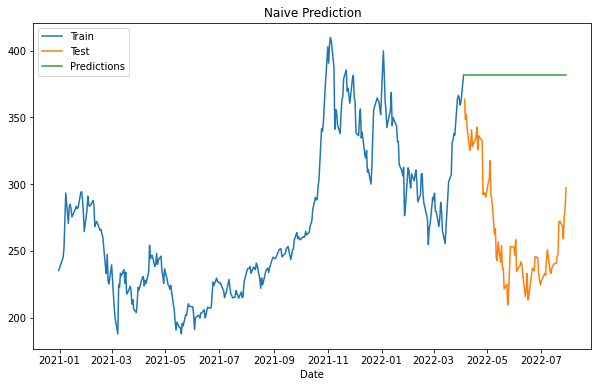

In [19]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions['naive_model'], label='Predictions')
plt.title('Naive Prediction')
plt.legend()
plt.xlabel('Date')
plt.show()

All right, as it is readily observable, naive method is so naive that it only takes into account the value at time t-1 and run prediction based on it. In order to have a better predictive performance from this model, the time at which you start your prediction it is of considerable importance.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_naive = mean_absolute_error(test, predictions['naive_model'])
mse_naive = mean_squared_error(test, predictions['naive_model'])
rmse_naive = np.sqrt(mean_squared_error(test, predictions['naive_model']))

In [26]:
naive_perf = {'mae_naive': mae_naive,
             'mse_naive':mse_naive,
             'rmse_naive':rmse_naive}
naive_perf = pd.DataFrame([naive_perf])
naive_perf

,mae_naive,mse_naive,rmse_naive
0,116.716305,15290.930943,123.656504


## Simple Moving Average Model 

This model is the simplest moving average model. It is based on an arithmetic moving average. That is to say, simple average model forecasts next values using the average of a fixed finite number, say n, of the previous values. Mathematically,

\begin{equation}
\hat{y} = \frac{1}{n}\Sigma_{j=t-n}^{t-1} (y_{t-1} + y_{t-2} + \cdots y_{t-n})
\end{equation}

As simple average method is calculated based on average price over a specificied period, it is used to identify trend:
    
* If simple average method goes up, it indicates a positive trend
* If simple average method goes down, it indicates a negative trend

Now, the question is how we pick the number `n` by which we run simple average model?

In [29]:
sma.head(10)

Date
2020-12-31           NaN
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
2021-01-11           NaN
2021-01-12    261.800833
2021-01-13    267.998335
2021-01-14    272.799583
Name: Close, dtype: float64

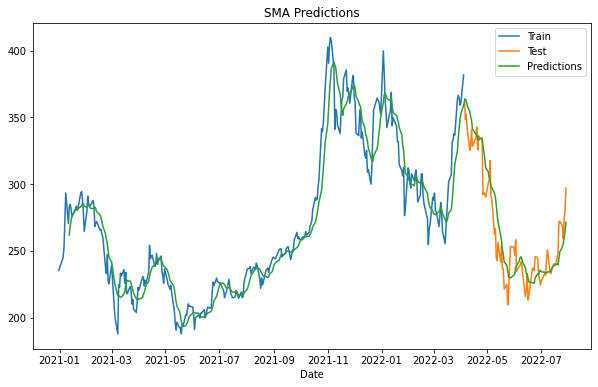

In [27]:
sma = tsla_close.rolling(8).mean()
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(sma.index, sma, label='Predictions')
plt.title('SMA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [38]:
mae_sma = mean_absolute_error(test,sma.loc['2022-04-05':])
mse_sma = mean_squared_error(test, sma.loc['2022-04-05':])
rmse_sma = np.sqrt(mean_squared_error(test, sma.loc['2022-04-05':]))

In [39]:
sma_perf = {'mae_sma': mae_sma,
             'mse_sma':mse_sma,
             'rmse_sma':rmse_sma}
sma_perf = pd.DataFrame([sma_perf])
sma_perf

,mae_sma,mse_sma,rmse_sma
0,12.371443,245.448084,15.666783


Please note that when we run rolling window, we do not need to use train-test split that we created before as it rolls over all the period. 

Besides, we have not used stationary data in naive and simple average model. But, from this model on, we are going to run regression-based time series models and stationary data is required.

Let's continue with moving average model.

## Moving Average

`Moving average`model tries to capture the time series dynamics simply by error terms. Let $e_t$ is a normally distributed term, meaning that it is identically and independently distributed (iid). So, unlike AR, MA is alway stationary.

MA(1) can be take the following form:

\begin{equation} X_{t} = \alpha + \beta \epsilon_{t-1} + \epsilon_{t} \end{equation}



Similarly, the $q_{th}$ order moving average model can be shown as MA(q):

\begin{equation} X_{t} = \alpha + \beta_1 \epsilon_{t-1} +\cdots+\beta_q \epsilon_{t-q} +\epsilon_{t} \end{equation}

Modeling a time series with MA in Python is not very different from modeling AR. The only difference is the location of the order (lag) parameter. The first parameter of order represent the number of lag values of AR whereas the second input of order in ARMA defines the number of lag values in modeling MA. A quick note: As the MA works with the windows, less order number might result in bad prediction.

In [40]:
tsla_diff = tsla_close.diff().dropna()

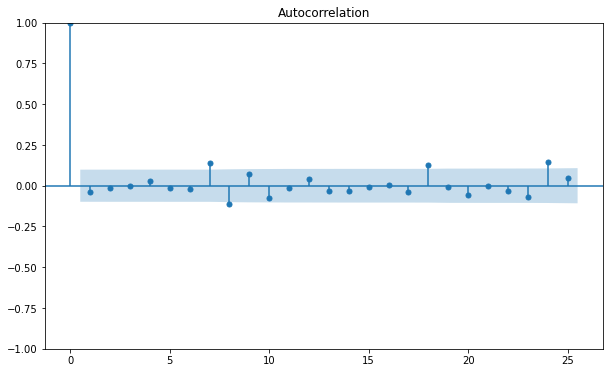

In [41]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(tsla_diff, lags=25);

Modeling a time series with MA in Python is not very different from modeling AR. The only difference is the location of the order (lag) parameter. The first parameter of order represent the number of lag values of AR whereas the second input of order in ARMA defines the number of lag values in modeling MA. A quick note: As the MA works with the windows, less order number might result in bad prediction.

Let's decide the best-fitting MA model. But before moving forward, I need to calculate the first difference and drop the missing values to not to get `exog contains inf or nans` error.

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
train_len = int(len(tsla_diff) * 0.8)
diff_train = tsla_diff[:train_len]
diff_test = tsla_diff[train_len:]

In [45]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [53]:
ma_model = ARIMA(diff_train, order=(0, 0, 8))
ma_result = ma_model.fit()

At this point, it is worthwhile to discuss the difference of in-sample and out-of-sample forecasts. Simple put, if we predict for an observation that is part of the data, then it is a in sample-forecast. If we predict for an observation that is not part of the data, it is refered to as out-of-sample forecast. Please note that some textbooks call in-sample forecast as prediction and out-of-sample as forecast. We can also follow this convention.

In [54]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

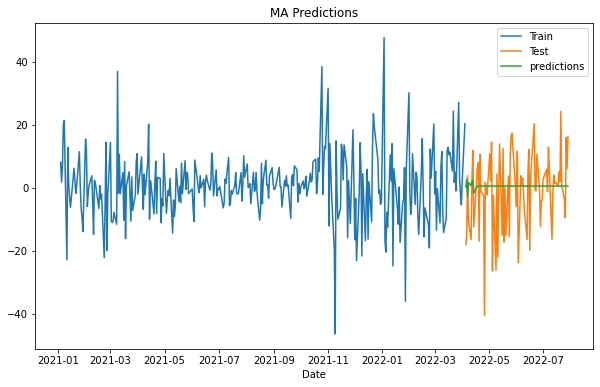

In [55]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
plt.title('MA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [56]:
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [57]:
ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,9.234438,150.1702,12.254395


In [58]:
ma_model = ARIMA(tsla_diff, order=(0, 0, 8))
ma_result = ma_model.fit()

In [88]:
forecast_index = pd.date_range(diff_test.index[-1], periods=10)

In [89]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

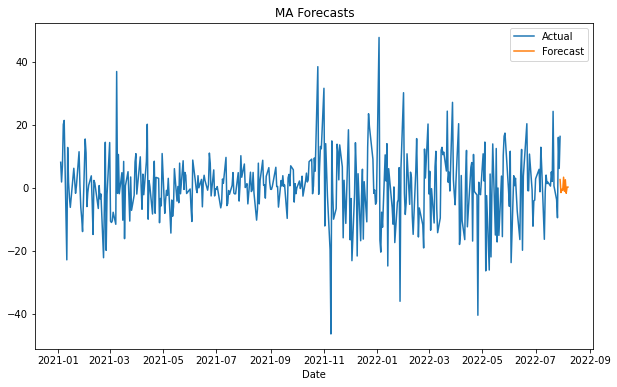

In [90]:
plt.plot(tsla_diff.index, tsla_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Date')
plt.show()

The predictive performance of MA is better than the models that we have visited so far. Satisfactory forecasting analysis can be expected accordingly.

## Autoregressive Model

`Autoregressive model` (AR) is one of the most basic models in time series. As its name suggest, we regress the current value of a series over its lagged values. So, it is based on the idea that current values of series $x_t$ can be accounted for as a function of past values.

Different lag values can be employed to explain the current value of $x_t$. Symbolically, AR(p) denotes that $x_t$ is explained by p past values of $x_t$.

For the sake of simplicity, AR(1) model can be represented by the following equation:

\begin{equation} X_{t} = \alpha + \beta X_{t-1} + \epsilon_t \end{equation}

Let us generalize the AR model as AR(p):

\begin{equation} X_{t} = \alpha + \beta X_{t-1} + \cdots +  \beta X_{t-p} + \epsilon_t \end{equation}

To sum up, the autoregressive model uses historical observations as input to a regression equations to predict the value at the next step. There is only one parameter we need to use in AR model, which is p. This determines how many previous time steps will be inputted.

The order, p, of the autoregressive model can be deterimined by looking at the PACF. 

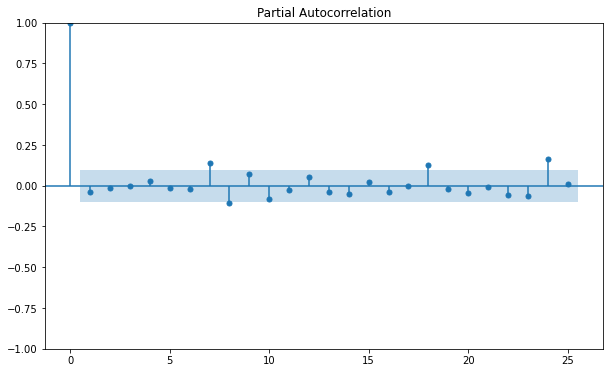

In [77]:
sm.graphics.tsa.plot_pacf(tsla_diff, lags=25);

The PACF shows some spikes at lag 7 and 8 in short horizon. In fact, we can also use spikes occured at longer horiozons such as 18 and 24. But please keep this in mind, if you put more and more parameters, your model tend to overfit. For more information about overfitting, please refer to [here](https://en.wikipedia.org/wiki/Overfitting).

In [78]:
ar_model = ARIMA(diff_train, order=(8, 0, 0))
ar_result = ar_model.fit()

In [79]:
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

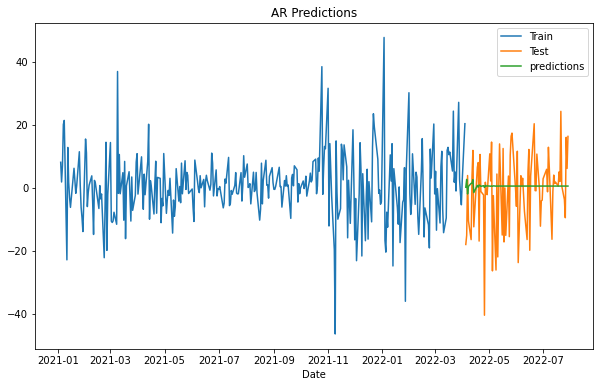

In [80]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index , ar_pred, label='predictions')
plt.title('AR Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [81]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [82]:
ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,9.218633,149.553995,12.229227


Let's run a 10-step forecasting analysis.

In [83]:
ar_model = ARIMA(tsla_diff, order=(8, 0, 0))
ar_result = ar_model.fit()

In [86]:
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

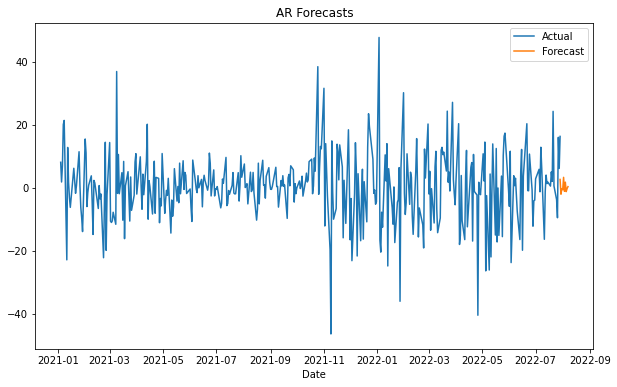

In [87]:
plt.plot(tsla_diff.index, tsla_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
plt.legend()
plt.title('AR Forecasts')
plt.xlabel('Date')
plt.show()

AR model outperforms all other models discussed so far.


From this point on up to the end of this module, we will talk about smoothing models. Smoothing models is to construct forecasts of future values as weighted averages of past observations with the more recent observations carrying more weight in determining forecasts than observations in the more distant past.

However, we can smooth out the historical observations in different ways. First off, single exponential smoothing will be our focus. Let's get started!

In [ ]:
Information criteria:
* AIC
* BIC
and some others.